In [6]:
import pandas

cv_df = pandas.read_csv("https://raw.githubusercontent.com/ondata/covid19italia/master/publication/riepilogoArchivio.csv",parse_dates=['datetime'])
latest = cv_df['datetime'].max()
print (late)


,Regione,Ricoverati con sintomi,Terapia intensiva,Isolamento domiciliare,Totale attualmente positivi,DIMESSI GUARITI,DECEDUTI,CASI TOTALI,TAMPONI,datetime
0,Lombardia,1169.0,244.0,364.0,1777,376.0,98.0,2251,12354,2020-03-05
1,Emilia Romagna,327.0,32.0,299.0,658,10.0,30.0,698,2884,2020-03-05
2,Veneto,92.0,24.0,264.0,380,17.0,10.0,407,11949,2020-03-05
3,Marche,57.0,19.0,44.0,120,NaN,4.0,124,413,2020-03-05
4,Piemonte,43.0,17.0,46.0,106,NaN,2.0,108,543,2020-03-05


In [7]:
from datetime import datetime
date_target = "2020-03-05"
cv_df_target = cv_df.loc[cv_df["datetime"]==date_target]
cv_df_target["REGIONE"] = cv_df_target.apply (lambda row: row['Regione'].upper().replace("'","").replace(" ",""), axis=1)
cv_df_target.head()

C:\Users\enric\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Regione,Ricoverati con sintomi,Terapia intensiva,Isolamento domiciliare,Totale attualmente positivi,DIMESSI GUARITI,DECEDUTI,CASI TOTALI,TAMPONI,datetime,REGIONE
0,Lombardia,1169.0,244.0,364.0,1777,376.0,98.0,2251,12354,2020-03-05,LOMBARDIA
1,Emilia Romagna,327.0,32.0,299.0,658,10.0,30.0,698,2884,2020-03-05,EMILIAROMAGNA
2,Veneto,92.0,24.0,264.0,380,17.0,10.0,407,11949,2020-03-05,VENETO
3,Marche,57.0,19.0,44.0,120,NaN,4.0,124,413,2020-03-05,MARCHE
4,Piemonte,43.0,17.0,46.0,106,NaN,2.0,108,543,2020-03-05,PIEMONTE


Text(0.5, 1.0, '2020-03-05 - casi in terapia intensiva')

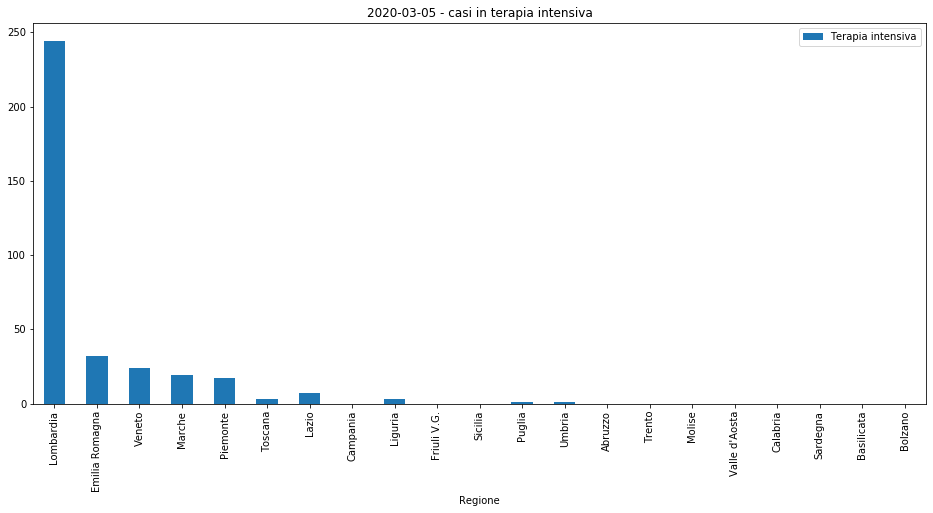

In [11]:
import matplotlib

ax = cv_df_target.plot.bar(x='Regione', y='Terapia intensiva', figsize=(16, 7))
ax.set_title(date_target + ' - casi in terapia intensiva')

In [12]:
import geopandas

reg_df = geopandas.read_file("https://app.geonue.com/geoserver/geonue/opendata_regioni_geom/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=opendata_regioni_geom&maxfeatures=2000&outputformat=application%2Fjson&srsName=EPSG:4326")
reg_df.head()

,id,nome_reg,link,dataset,riusabilita,geometry
0,opendata_regioni_geom.fid--61985fb8_170b02c33e...,SARDEGNA,http://dati.regione.sardegna.it/dataset,560.0,3.0,"MULTIPOLYGON (((8.20360 40.58113, 8.20369 40.5..."
1,opendata_regioni_geom.fid--61985fb8_170b02c33e...,BASILICATA,http://dati.regione.basilicata.it/catalog/,822.0,3.0,"MULTIPOLYGON (((15.72358 39.96828, 15.72346 39..."
2,opendata_regioni_geom.fid--61985fb8_170b02c33e...,CALABRIA,http://pr5sit.regione.calabria.it/web/pr5sit/s...,37.0,3.0,"MULTIPOLYGON (((15.81605 39.67696, 15.81584 39..."
3,opendata_regioni_geom.fid--61985fb8_170b02c33e...,CAMPANIA,http://porfesr.regione.campania.it/it/benefici...,1.0,3.0,"MULTIPOLYGON (((14.03963 40.79831, 14.04005 40..."
4,opendata_regioni_geom.fid--61985fb8_170b02c33e...,EMILIA-ROMAGNA,http://dati.emilia-romagna.it,560.0,3.0,"MULTIPOLYGON (((12.28072 44.54029, 12.28083 44..."


In [13]:
reg_df["REGIONE"] = reg_df.apply (lambda row: row['nome_reg'].upper().replace("-","").replace(" ",""), axis=1)
cv_df_geo = reg_df.merge(cv_df_target, left_on='REGIONE', right_on='REGIONE')
cv_df_geo.head()

,id,nome_reg,link,dataset,riusabilita,geometry,REGIONE,Regione,Ricoverati con sintomi,Terapia intensiva,Isolamento domiciliare,Totale attualmente positivi,DIMESSI GUARITI,DECEDUTI,CASI TOTALI,TAMPONI,datetime
0,opendata_regioni_geom.fid--61985fb8_170b02c33e...,SARDEGNA,http://dati.regione.sardegna.it/dataset,560.0,3.0,"MULTIPOLYGON (((8.20360 40.58113, 8.20369 40.5...",SARDEGNA,Sardegna,2.0,NaN,NaN,2,NaN,NaN,2,50,2020-03-05
1,opendata_regioni_geom.fid--61985fb8_170b02c33e...,BASILICATA,http://dati.regione.basilicata.it/catalog/,822.0,3.0,"MULTIPOLYGON (((15.72358 39.96828, 15.72346 39...",BASILICATA,Basilicata,NaN,NaN,1.0,1,NaN,NaN,1,54,2020-03-05
2,opendata_regioni_geom.fid--61985fb8_170b02c33e...,CALABRIA,http://pr5sit.regione.calabria.it/web/pr5sit/s...,37.0,3.0,"MULTIPOLYGON (((15.81605 39.67696, 15.81584 39...",CALABRIA,Calabria,1.0,NaN,1.0,2,NaN,NaN,2,53,2020-03-05
3,opendata_regioni_geom.fid--61985fb8_170b02c33e...,CAMPANIA,http://porfesr.regione.campania.it/it/benefici...,1.0,3.0,"MULTIPOLYGON (((14.03963 40.79831, 14.04005 40...",CAMPANIA,Campania,12.0,NaN,33.0,45,NaN,NaN,45,471,2020-03-05
4,opendata_regioni_geom.fid--61985fb8_170b02c33e...,EMILIA-ROMAGNA,http://dati.emilia-romagna.it,560.0,3.0,"MULTIPOLYGON (((12.28072 44.54029, 12.28083 44...",EMILIAROMAGNA,Emilia Romagna,327.0,32.0,299.0,658,10.0,30.0,698,2884,2020-03-05


C:\Users\enric\Miniconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


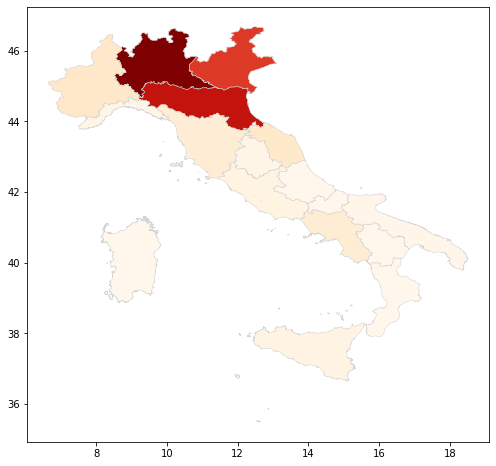

In [15]:
import descartes

#Generate inline plots
%matplotlib inline
cv_df_geo.plot(column='Isolamento domiciliare',cmap='OrRd', edgecolor = "lightgrey", linewidth = 0.5, figsize=(18, 8))